In [33]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.helpers import missingness_checks
from src import config

sns.set_style('white')
sns.set_palette('deep')

### Import dataset (transactions)

In [31]:
transactions = pd.read_parquet(config.INT_FILE_PATH / "transactions.parquet")

### Missingness checks

2022-05-22 23:28:20,665:root:INFO - Number of missing columns: 33842
2022-05-22 23:28:20,824:root:INFO - Missing columns (0: No missing values, 1: Missing values) customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_name_length              2378
product_description_length       2378
product_photos_qty               2378
product_weight_g                  793
p

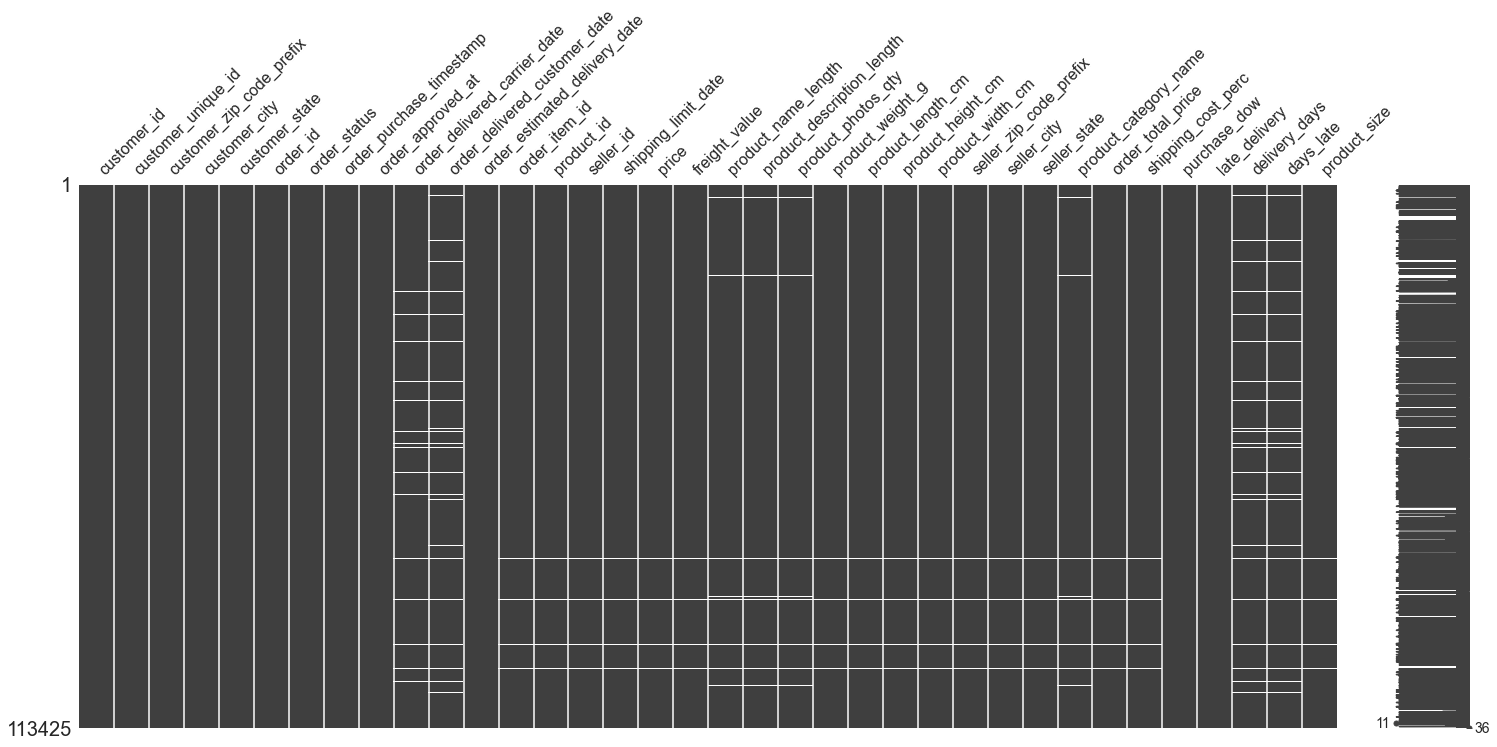

2022-05-22 23:28:22,378:root:INFO - Missingness correlations


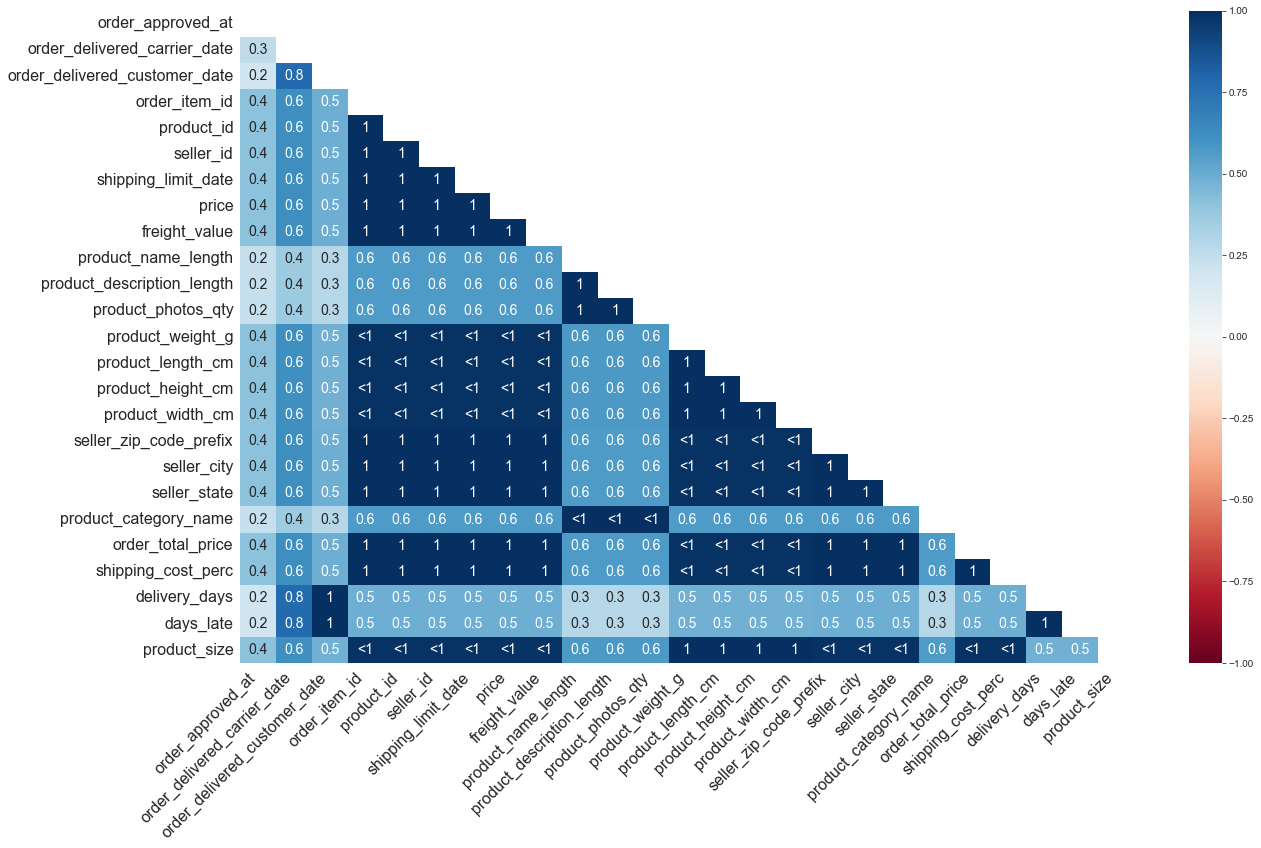

In [34]:
## general 
missingness_checks(transactions)

In [38]:
transactions.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_name_length              2378
product_description_length       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
seller_zip_code_prefix            775
seller_city 

2022-05-22 23:31:46,085:root:INFO - Number of missing columns: 33842
2022-05-22 23:31:46,258:root:INFO - Missing columns (0: No missing values, 1: Missing values) customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_name_length              2378
product_description_length       2378
product_photos_qty               2378
product_weight_g                  793
p

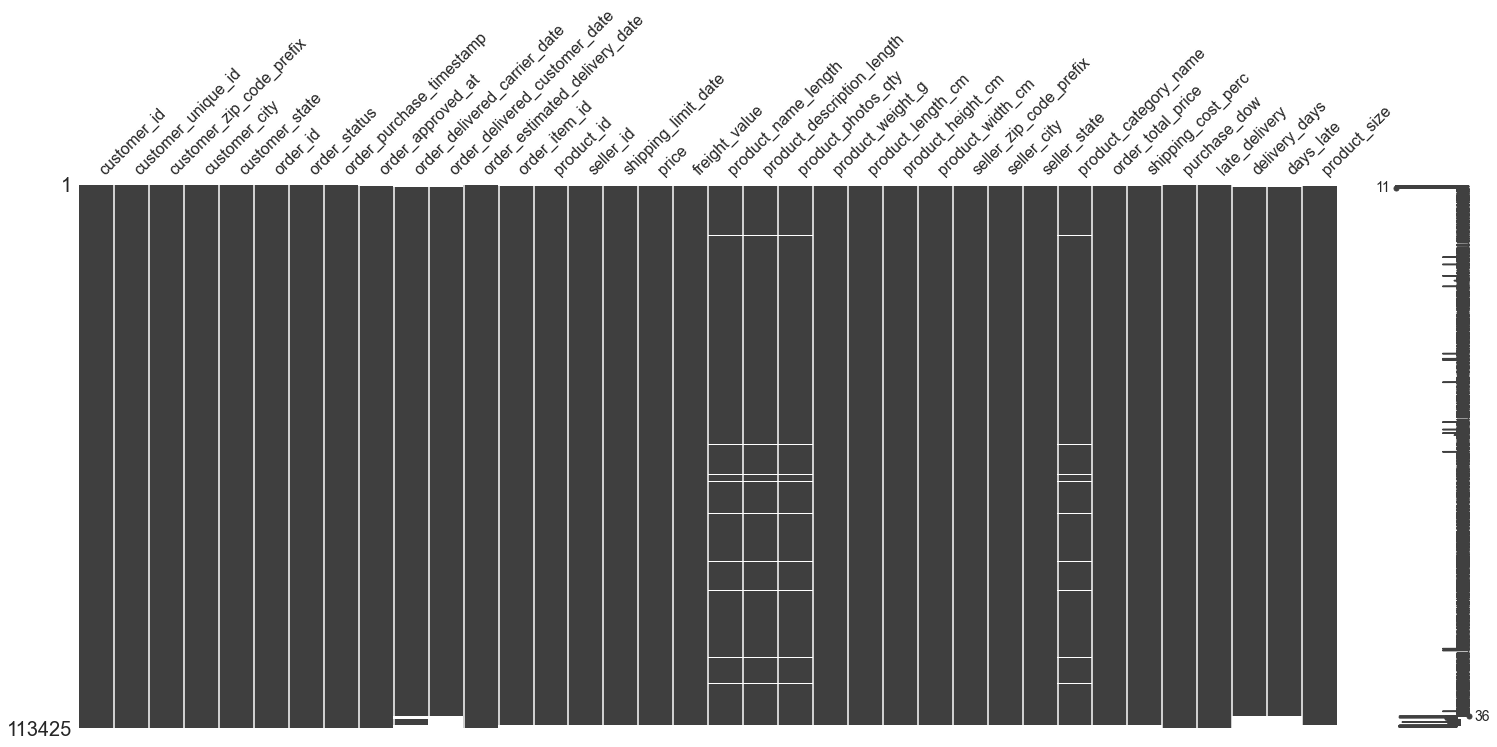

2022-05-22 23:31:47,724:root:INFO - Missingness correlations


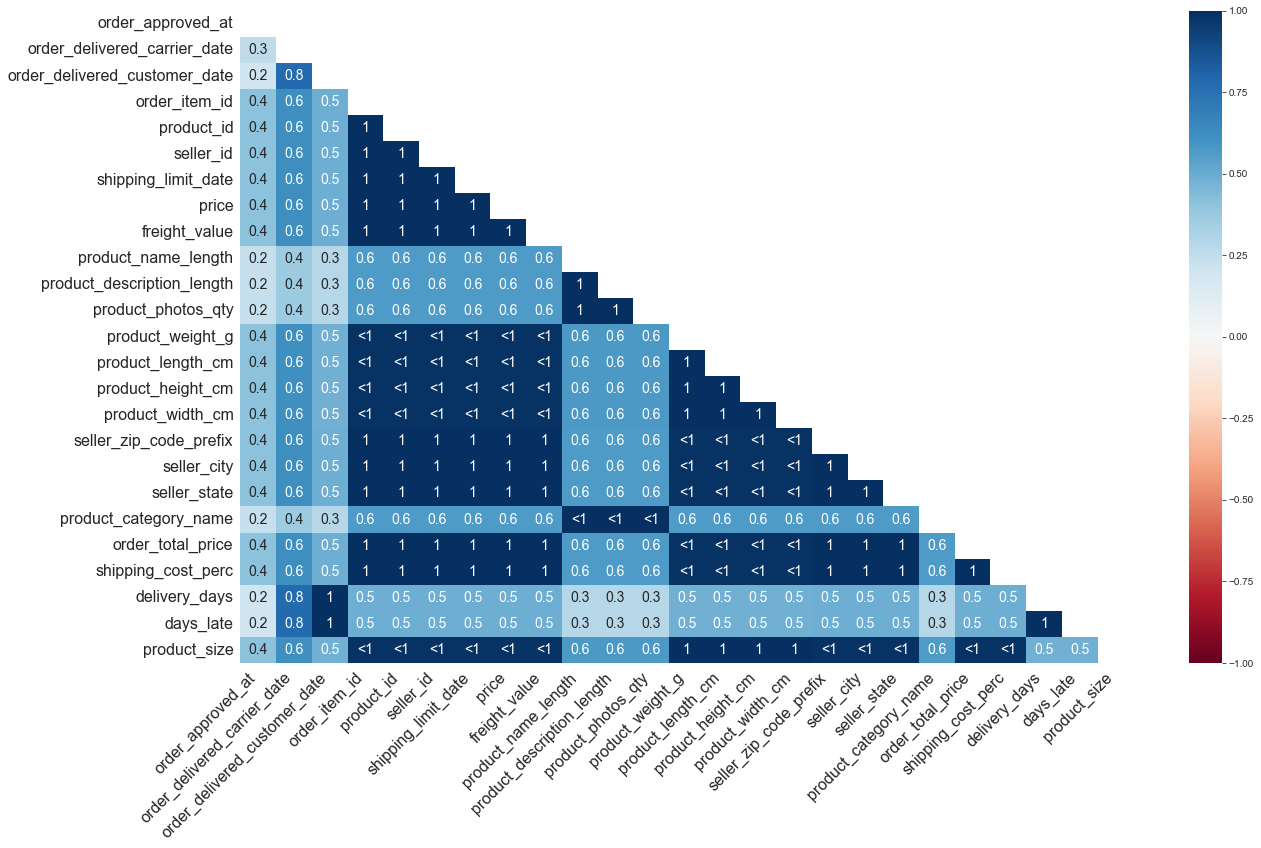

In [40]:
missingness_checks(transactions.sort_values(by="order_status"))

### Filtering

In [60]:
order_statuses = {key: df.loc[val] for key, val in df.groupby('order_status').groups.items()}

approved


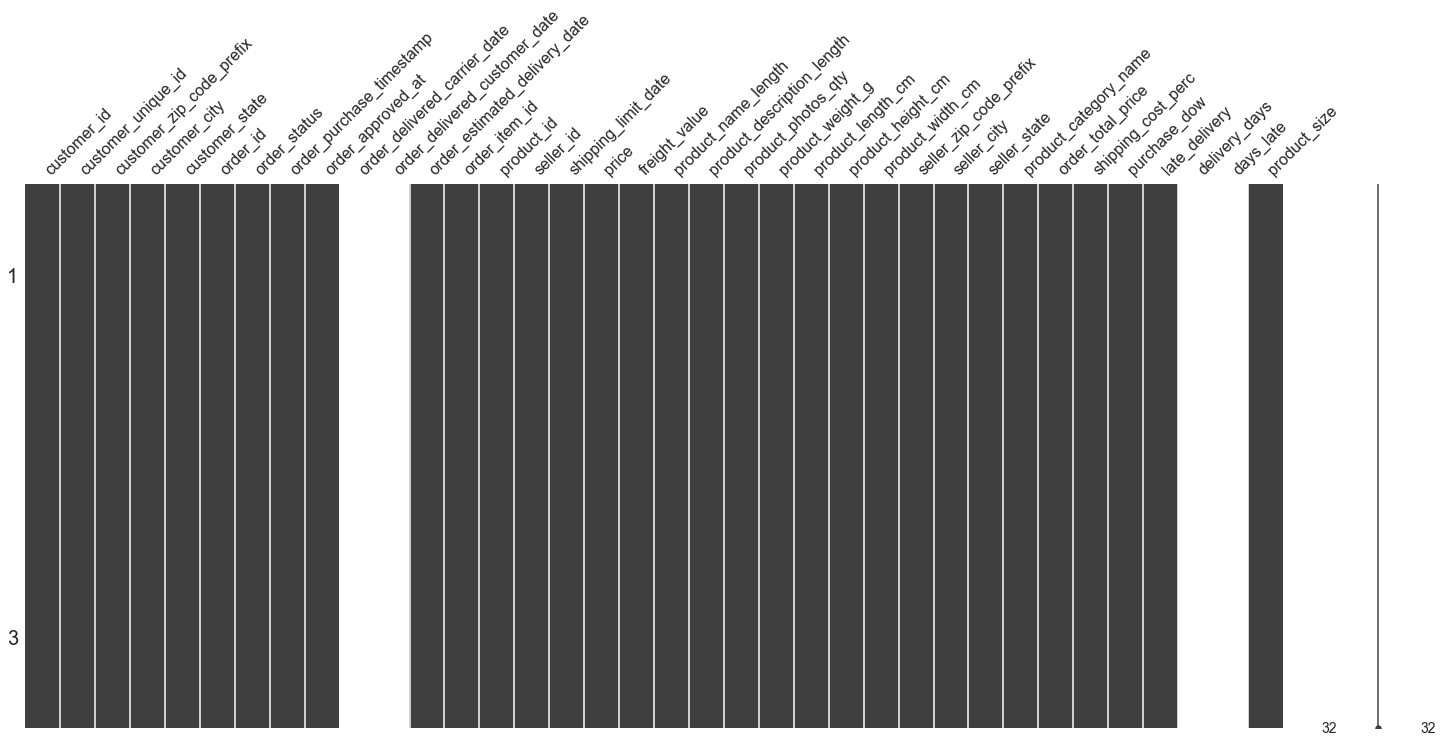

canceled


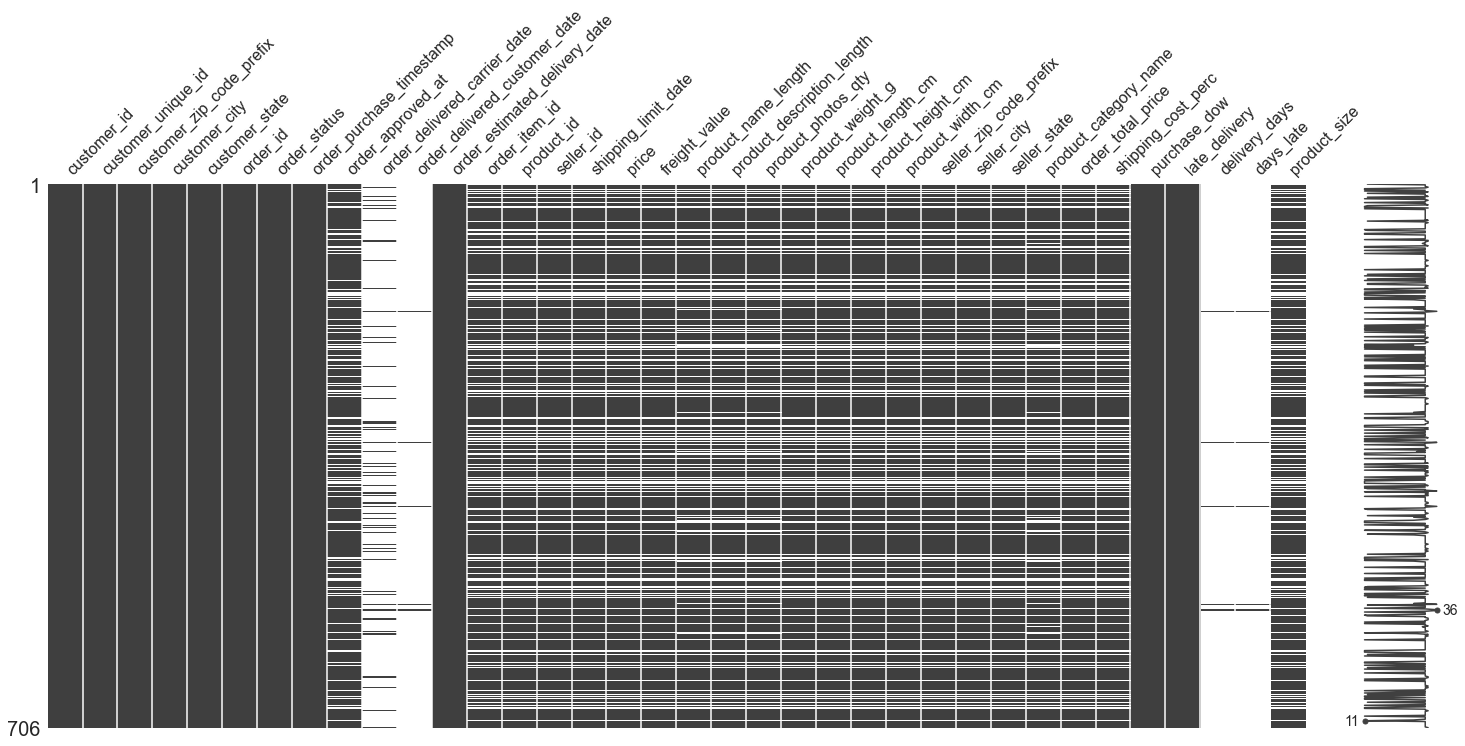

created


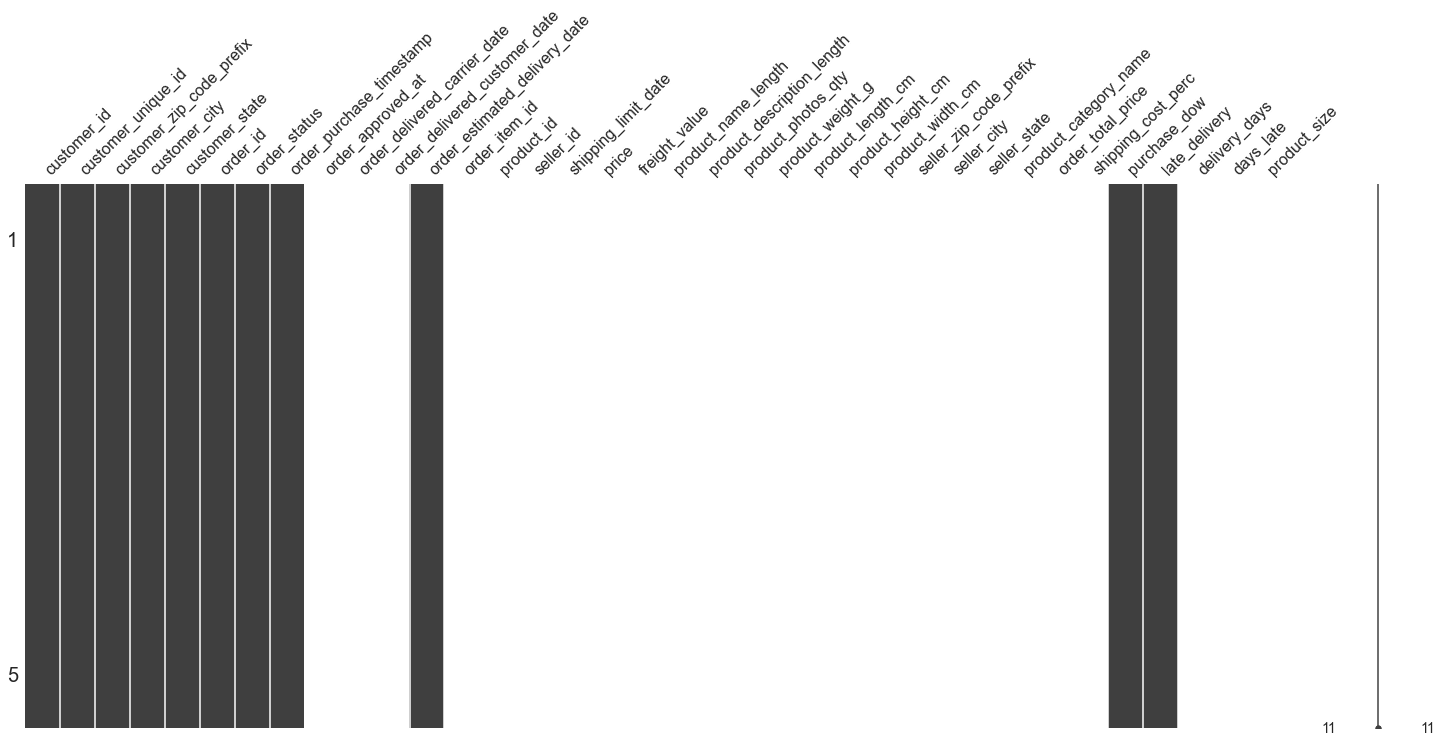

delivered


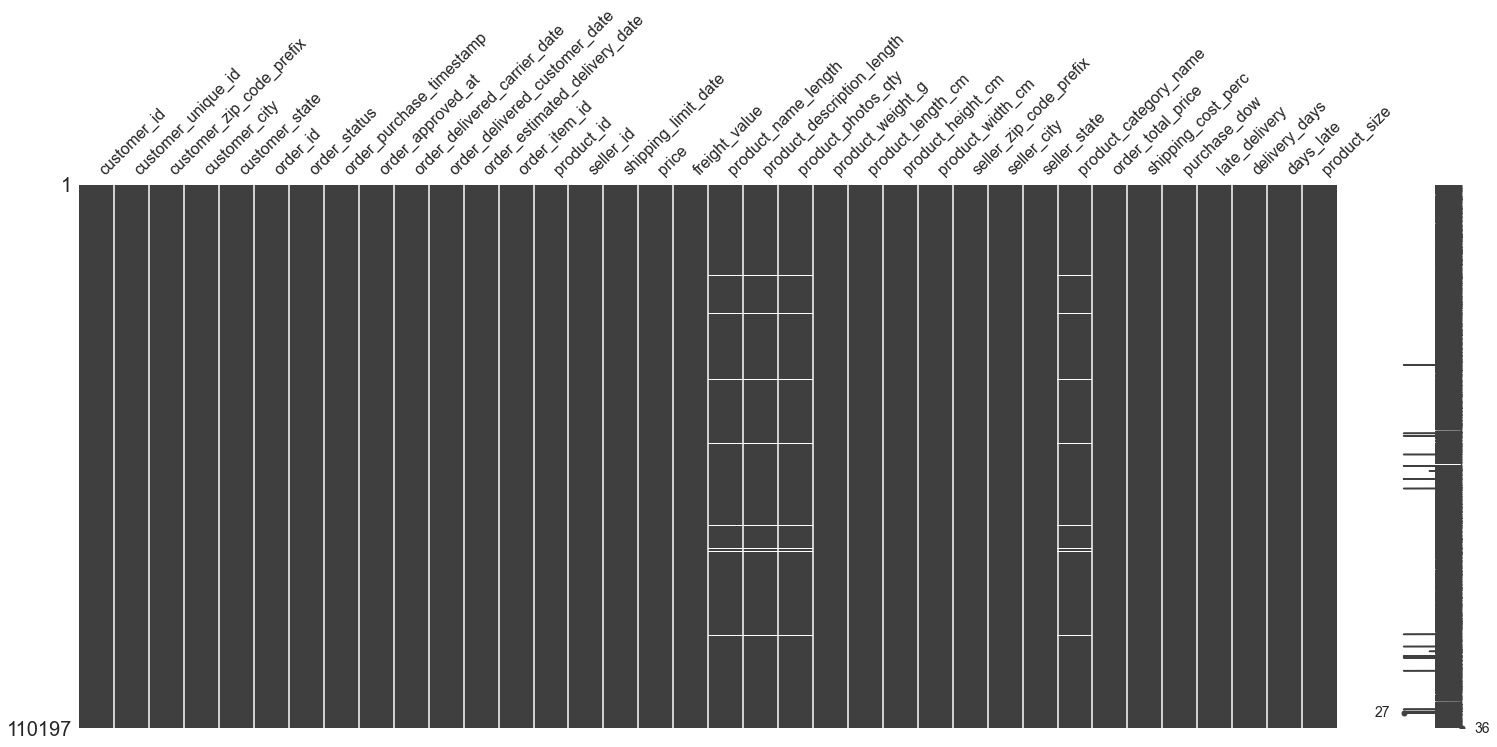

invoiced


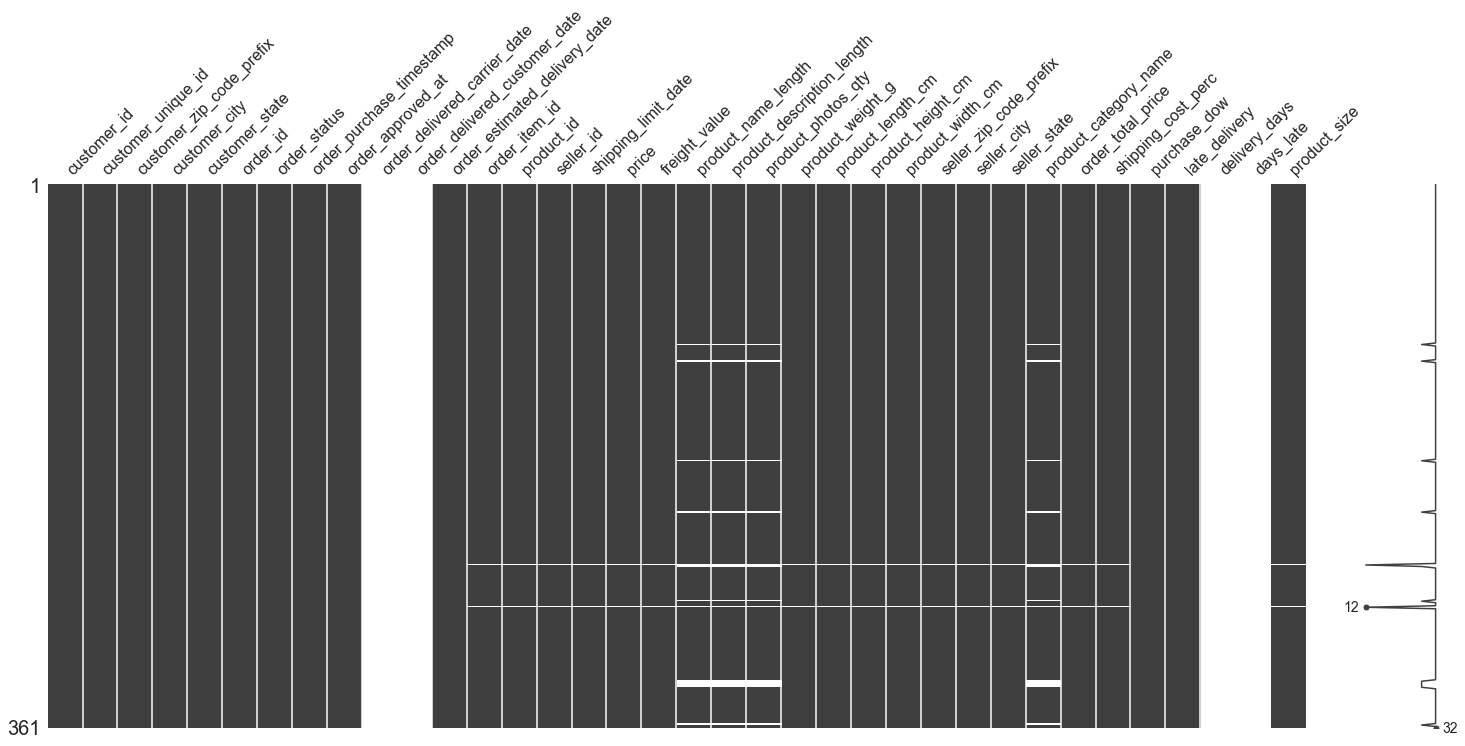

processing


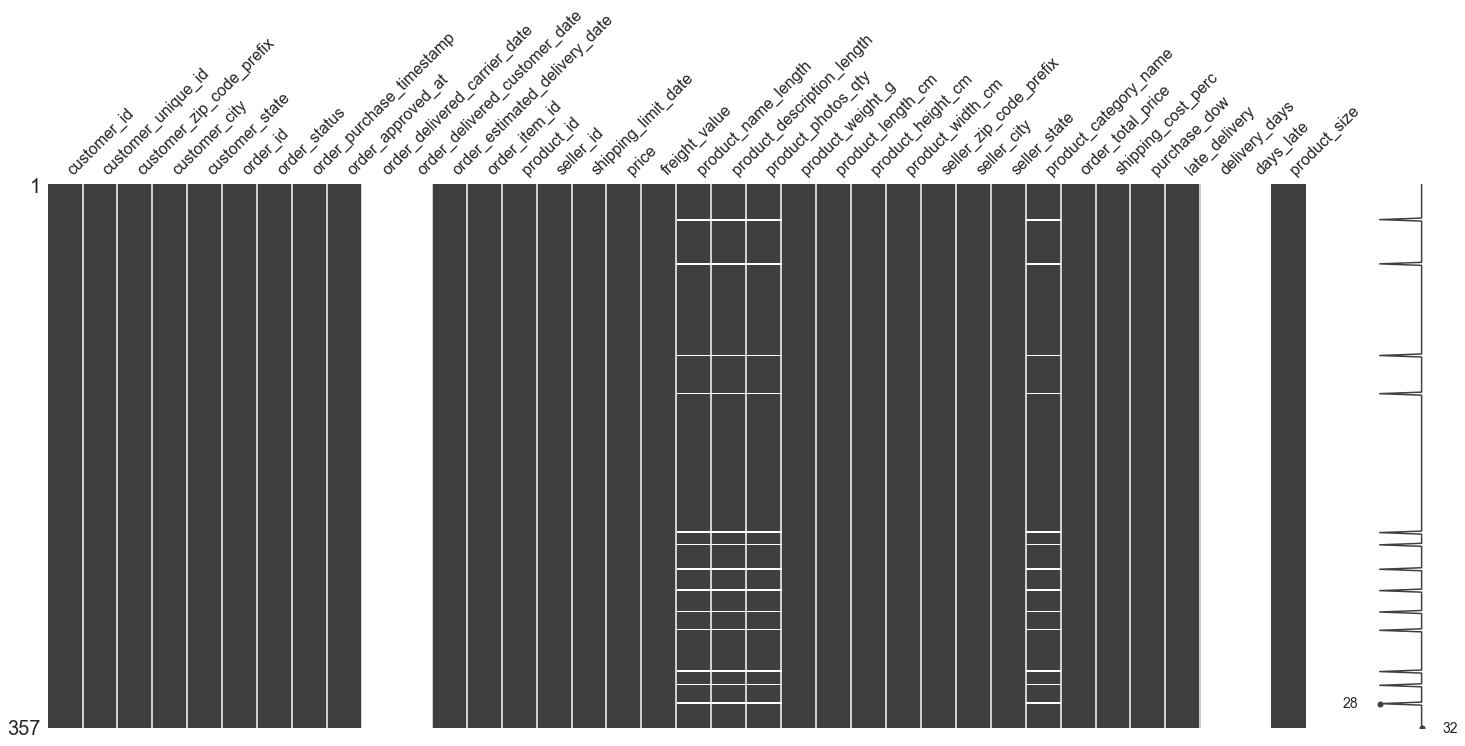

shipped


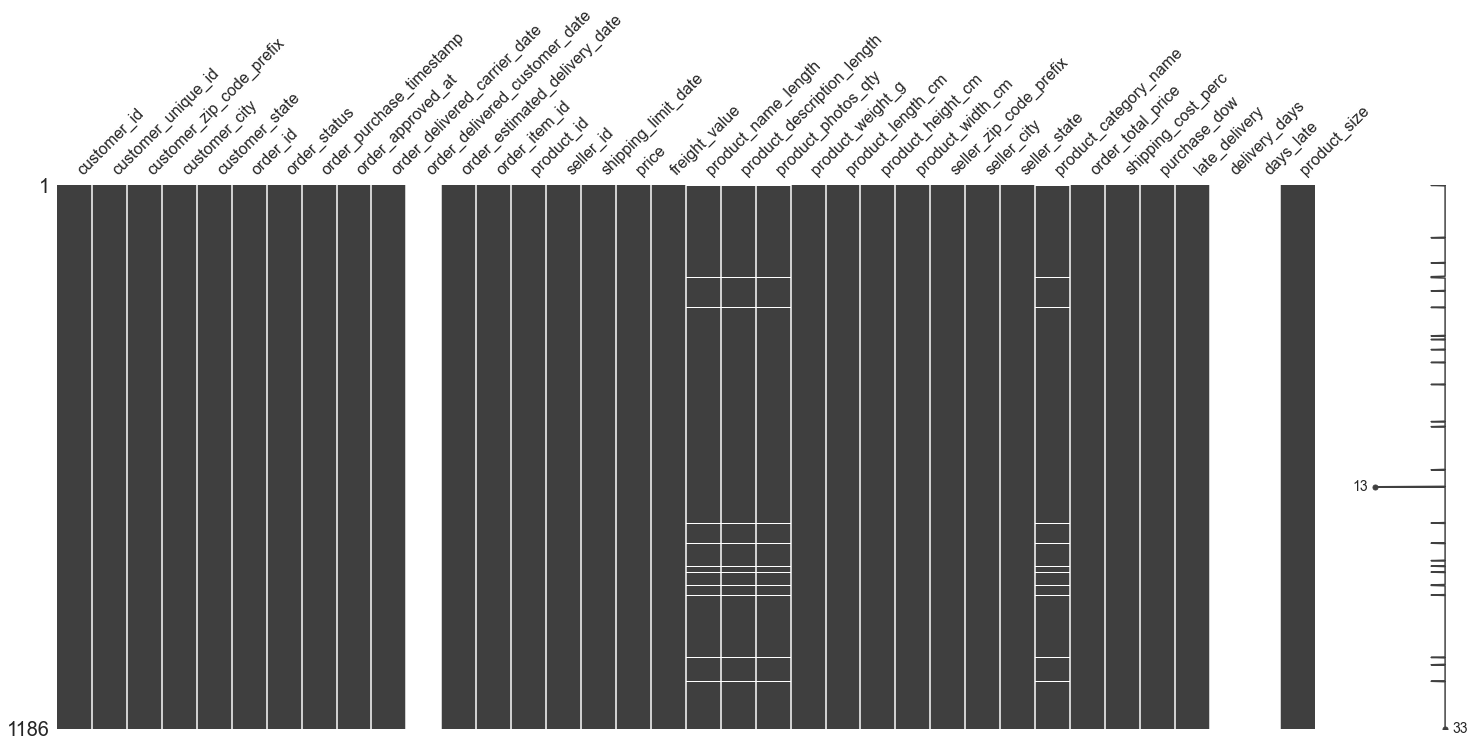

unavailable


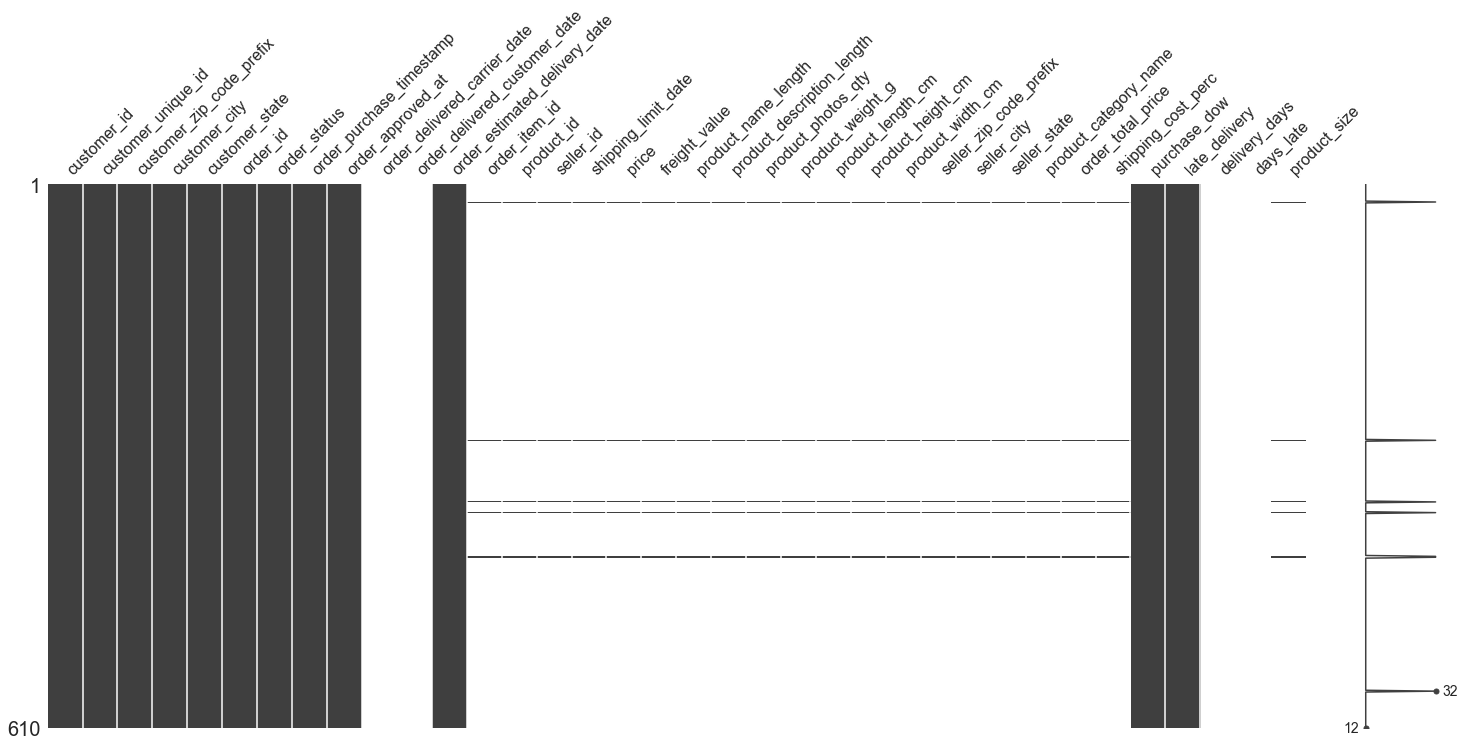

In [61]:
for key, df in order_statuses.items():
    print(key)
    msno.matrix(df)
    plt.show()